In [1163]:
#!/usr/bin/python3 (3.8.10 x64)
import numpy as np
import pygad
import os
import mazes

Create a function that reads the 2D representation of a maze and returns the shortest path found by a genetic algorithm.

In [1164]:
# Convert mazes into 2D array of chars
def get_maze(maze):
    res = []
    for i in range(len(maze)):
        row = list(list(maze[i])[0])
        res.append(row)
        
    return np.array(res)

In [1165]:
# Convert mazes
maze1 = get_maze(mazes.maze1)
maze2 = get_maze(mazes.maze2)
maze3 = get_maze(mazes.maze3)
maze4 = get_maze(mazes.maze4)
maze5 = get_maze(mazes.maze5)
maze6 = get_maze(mazes.maze6)
maze7 = get_maze(mazes.maze7)
maze3_T = get_maze(mazes.maze3_T) 
maze4_T = get_maze(mazes.maze4_T) 
maze5_T = get_maze(mazes.maze5_T) 
maze7_T = get_maze(mazes.maze7_T) 

In [1166]:
# Return a tuple containing indices of start
def find_start(maze):
    '''
        Return an array containing indices of start
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "S":
                return [i,j]

In [1167]:
# Return a tuple containing indices of end
def find_end(maze):
    '''
    Return an array containing indices of end
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "E":
                return [i,j]

Solution will be encoded as follows:
* It will be a vector of values (np array)
* Each value will span from 0 to 3
* Each value corresponds to a direction 
* * 0 - up
* * 1 - down
* * 2 - left
* * 3 - right

Maze: `h x w` matrix, possible values of maze[i,j]:
* `#` - wall
* `.` - valid field
* `S` - starting field
* `E` - ending field

Maze[i,j] gives:
*   (0) up = Maze[i-1, j]
*   (1) down = Maze[i+1, j]
*   (2) left = Maze[i, j-1]
*   (3) right = Maze[i, j+1]

In [1168]:
solutions = [False]
def set_solutions_false():
    solutions[0] = False
    
def shortest_path(maze, i, j, visited):
    if [i,j] in visited:
        return 0
    
    path_len = 0
    visited.append([i,j])
        
    if maze[i,j] == "E":
        solutions[0] = True;
        return 0
    
    if i > 0 and maze[i-1, j] != "#":
        path_len = shortest_path(maze, i-1, j, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
    
    if j > 0 and maze[i, j-1] != "#":
        path_len = shortest_path(maze, i, j-1, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
        
    if i < maze.shape[0]-1 and maze[i+1, j] != "#":
        path_len = shortest_path(maze, i+1, j, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
         
    
    if j < maze.shape[1]-1 and maze[i, j+1] != "#":
        path_len = shortest_path(maze, i, j+1, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len    
        
    visited.remove([i,j])

    solutions[0] = False
    return path_len

solutions = [False]

In [1169]:
def get_shortest_path(maze):
    set_solutions_false()
    start = find_start(maze)
    m = maze.copy()
    res = shortest_path(m, start[0], start[1], [])
    return res, m
    

In [1170]:
# Choose which maze to solve
maze = maze2


In [1245]:
def fitness(solution, solution_index):
    '''
        Takes in a maze and a solution and solution_index
        Returns a scalar score
    '''
    score = 0
    seen = []
    
    start = find_start(maze)
    end = find_end(maze)
    
    position = start
    for move in solution:
        
        # Determine direction
        if move == 0:
            position[0] -= 1
        elif move == 1:
            position[0] += 1
        elif move == 2:
            position[1] -= 1
        elif move == 3:
            position[1] += 1
            
        i,j = position[0], position[1]
        
        # Out of bounds
        if i < 0 or j < 0 or i > maze.shape[0]-1 or j > maze.shape[1]-1:
            score -= 100
            break;
        
        if position in seen:
            score -= 10
        
        # Finish
        if maze[i,j] == "E":
            print("SOLUTION")
            score += 100
            print(score)
            break;
        
        if maze[i,j] == "." and position not in seen:
            score += 15
        
        # Penalize wall and path length
        if maze[i,j] == "#":
            score -= 150
            break;
            if position in seen:
                score -= 1000
        seen.append(position)
    
    return score

In [1246]:
num_generations = 2000
num_parents_mating = 10

solutions_per_pop = 100

num_genes, dfs_solution = get_shortest_path(maze)
print(num_genes)

init_range_low = 0
init_range_high = 3

parent_selection_type = "sus"
keep_parents = 0

crossover_type = "single_point"
crossover_probability = 0.5

mutation_type = "random"
mutation_probability = 0.8
mutation_percent_genes = 10

10


In [1247]:
def callback_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

In [1248]:
def on_crossover(ga_instance, children):
    print(ga_instance.generations_completed, children)

In [1249]:
ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=solutions_per_pop,
                        num_genes=num_genes,
                        gene_type=int,
                        parent_selection_type=parent_selection_type,
                        keep_parents=-1,
                        crossover_type=crossover_type,
                        crossover_probability=crossover_probability,
                        mutation_type=mutation_type,
                        keep_elitism=solutions_per_pop//2,
                        #save_best_solutions=True,
                        random_mutation_min_val=0,
                        random_mutation_max_val=3,
                        mutation_by_replacement=False,
                        gene_space=[0,1,2,3],
                        mutation_percent_genes=mutation_percent_genes,
                        mutation_probability=mutation_probability,
                        on_generation=callback_gen,
                        )

In [1250]:
def visualize(maze, solution):
    m = maze.copy()
    pos = find_start(maze)
    sol = []
    for step in solution:
        try:
            if step == 0:
                sol.append("U")
                pos[0] -= 1
            elif step == 1:
                sol.append("D")
                pos[0] += 1
            elif step == 2:
                sol.append("L")
                pos[1] -= 1
            else:
                sol.append("R")
                pos[1] += 1
            m[pos[0], pos[1]] = "O" 
        except IndexError:
            pass
            #print("out of bounds")
            
    return m, sol


In [1251]:
ga_instance.run()

Generation :  1
Fitness of the best solution : -75
Generation :  2
Fitness of the best solution : -75
Generation :  3
Fitness of the best solution : -75
Generation :  4
Fitness of the best solution : -75
Generation :  5
Fitness of the best solution : -75
Generation :  6
Fitness of the best solution : -75
Generation :  7
Fitness of the best solution : -75
Generation :  8
Fitness of the best solution : -75
Generation :  9
Fitness of the best solution : -75
Generation :  10
Fitness of the best solution : -75
Generation :  11
Fitness of the best solution : -75
Generation :  12
Fitness of the best solution : -75
Generation :  13
Fitness of the best solution : -75
Generation :  14
Fitness of the best solution : -75
Generation :  15
Fitness of the best solution : -75
Generation :  16
Fitness of the best solution : -75
Generation :  17
Fitness of the best solution : -75
Generation :  18
Fitness of the best solution : -75
Generation :  19
Fitness of the best solution : -75
Generation :  20
Fitn

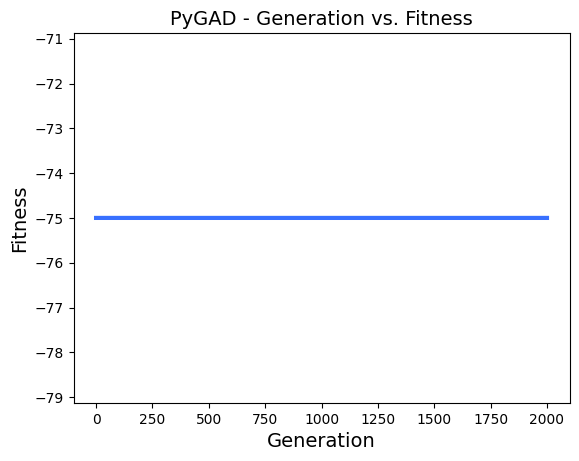

Parameters of the best solution : [2 1 2 0 3 2 3 2 1 0] index =  0
Fitness value of the best solution = -75


In [1252]:
ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution), "index = ", solution_idx)
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


#prediction = np.sum(np.array(ins)*solution)
#print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

In [1253]:
m, sol = visualize(maze, solution)
print("solution", sol)
print("GA\n", m, len(solution), "\n")
print("DFS\n", dfs_solution)

solution ['L', 'D', 'L', 'U', 'R', 'L', 'R', 'L', 'D', 'U']
GA
 [['#' '#' '#' '#' '#' 'E' '#']
 ['#' '.' '#' '.' '#' '.' '#']
 ['#' '.' '.' '.' '.' '.' '#']
 ['#' '#' '.' '#' '#' '#' '#']
 ['#' '.' '.' 'O' 'O' 'S' '#']
 ['#' '.' '#' 'O' 'O' '#' '#']
 ['#' '#' '#' '#' '#' '#' '#']] 10 

DFS
 [['#' '#' '#' '#' '#' 'E' '#']
 ['#' '.' '#' '.' '#' '0' '#']
 ['#' '.' '0' '0' '0' '0' '#']
 ['#' '#' '0' '#' '#' '#' '#']
 ['#' '.' '0' '0' '0' '0' '#']
 ['#' '.' '#' '.' '.' '#' '#']
 ['#' '#' '#' '#' '#' '#' '#']]
